## 1. Загрузка библиотек и данных

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

np.random.seed(42)


In [2]:
df = pd.read_csv('data/california_housing_train.csv')
print(f"Размер датасета: {df.shape}")
df.head()


Размер датасета: (17000, 9)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.49,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.82,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.65,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.19,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.93,65500.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           17000 non-null  float64
 1   latitude            17000 non-null  float64
 2   housing_median_age  17000 non-null  float64
 3   total_rooms         17000 non-null  float64
 4   total_bedrooms      17000 non-null  float64
 5   population          17000 non-null  float64
 6   households          17000 non-null  float64
 7   median_income       17000 non-null  float64
 8   median_house_value  17000 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


## 2. Статистический анализ и визуализация


In [4]:
df.describe()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00,17000.00
mean,-119.56,35.63,28.59,2643.66,539.41,1429.57,501.22,3.88,207300.91
std,2.01,2.14,12.59,2179.95,421.50,1147.85,384.52,1.91,115983.76
min,-124.35,32.54,1.00,2.00,1.00,3.00,1.00,0.50,14999.00
25%,-121.79,33.93,18.00,1462.00,297.00,790.00,282.00,2.57,119400.00
50%,-118.49,34.25,29.00,2127.00,434.00,1167.00,409.00,3.54,180400.00
75%,-118.00,37.72,37.00,3151.25,648.25,1721.00,605.25,4.77,265000.00
max,-114.31,41.95,52.00,37937.00,6445.00,35682.00,6082.00,15.00,500001.00


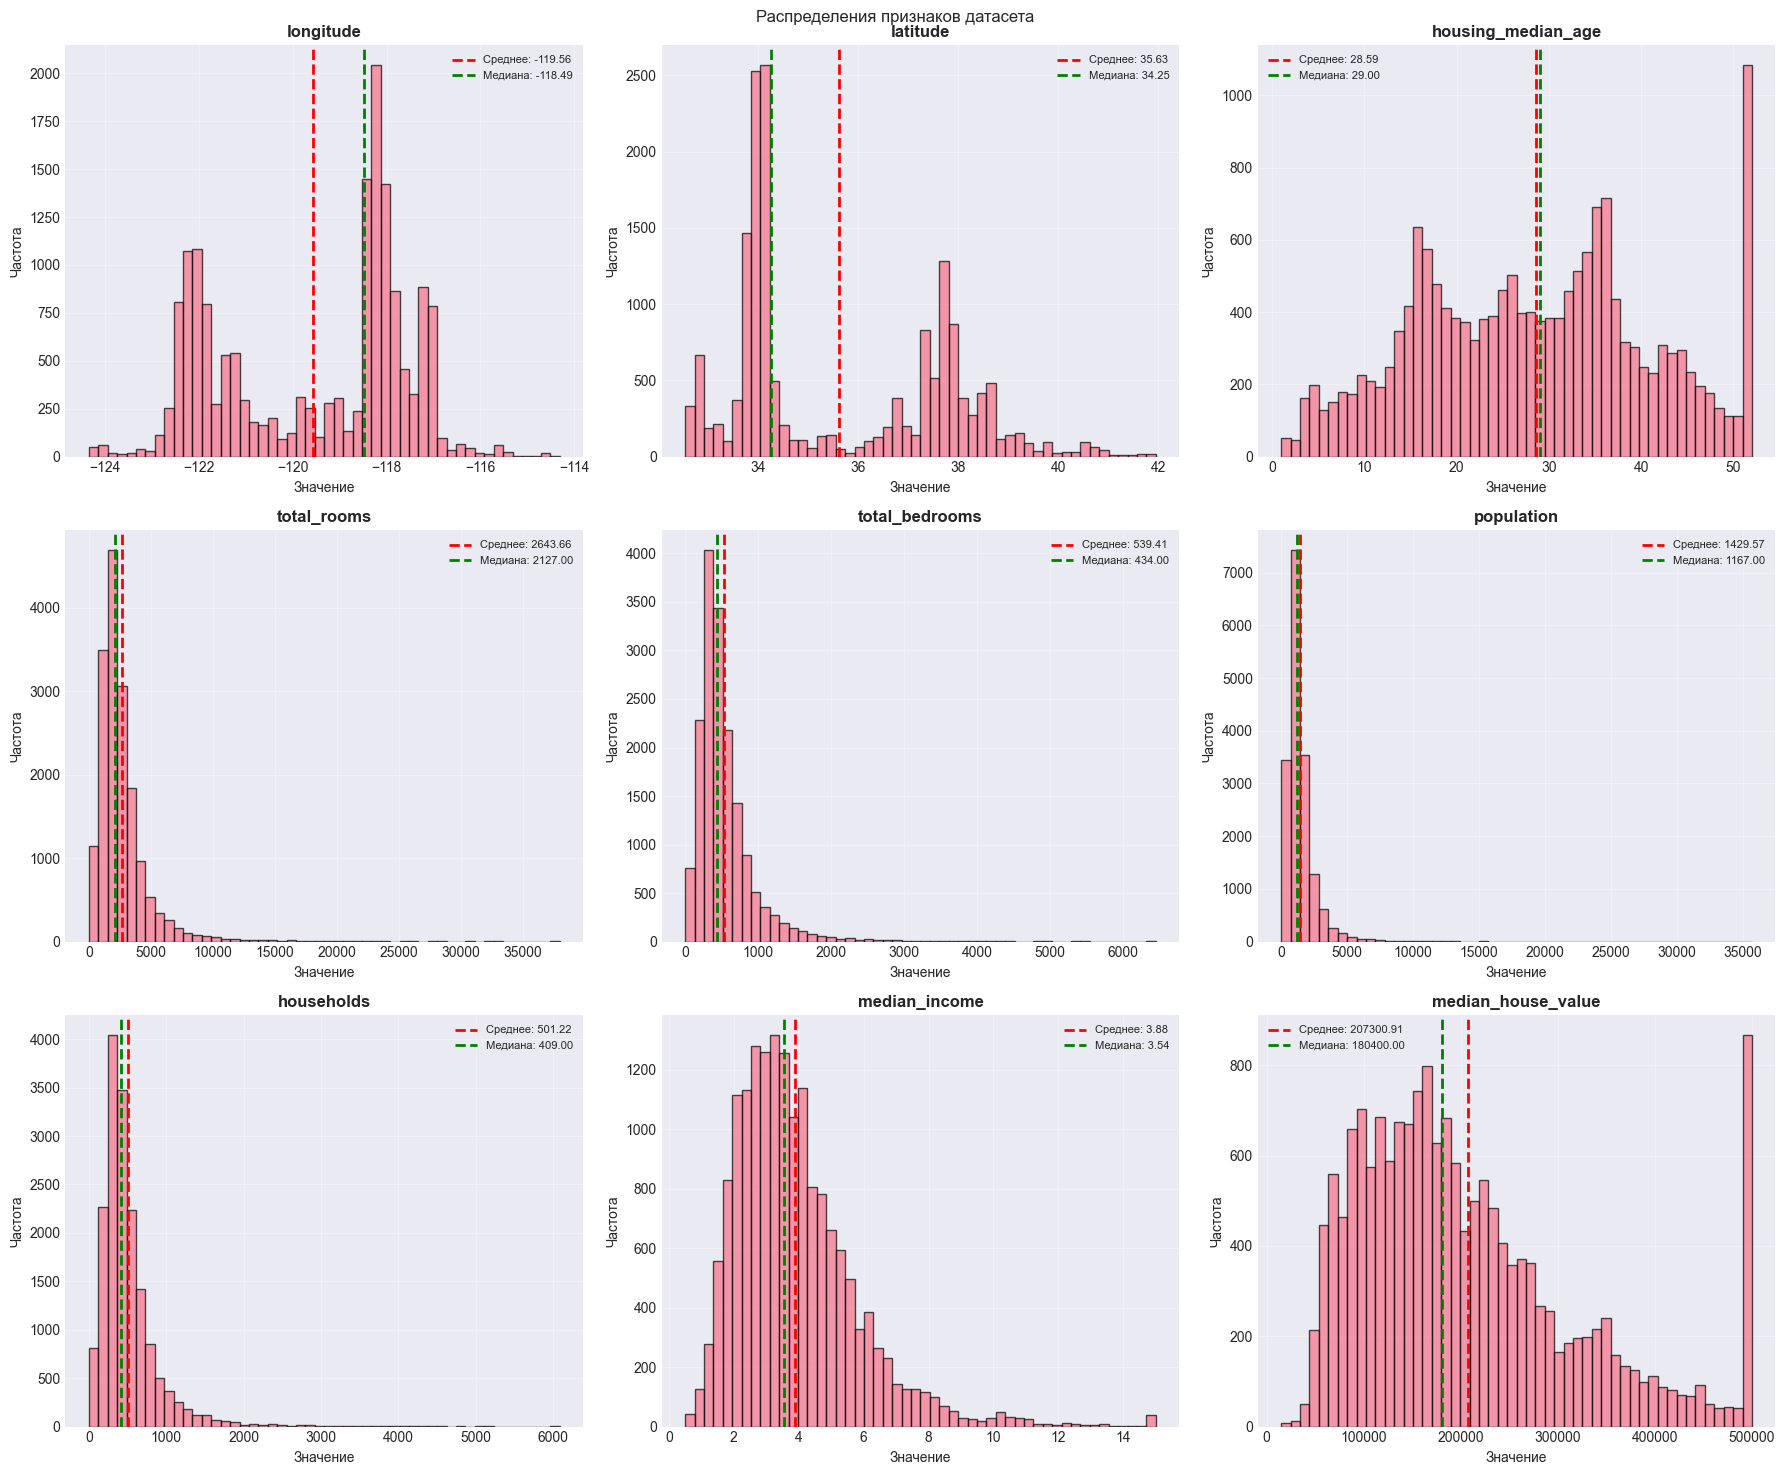

In [5]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Распределения признаков датасета')

for idx, column in enumerate(df.columns):
    ax = axes[idx // 3, idx % 3]
    
    ax.hist(df[column].dropna(), bins=50, edgecolor='black', alpha=0.7)
    ax.set_title(f'{column}', fontsize=12, fontweight='bold')
    ax.set_xlabel('Значение')
    ax.set_ylabel('Частота')
    ax.grid(True, alpha=0.3)
    
    mean_val = df[column].mean()
    median_val = df[column].median()
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Среднее: {mean_val:.2f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Медиана: {median_val:.2f}')
    ax.legend(fontsize=8)

plt.tight_layout()
plt.show()


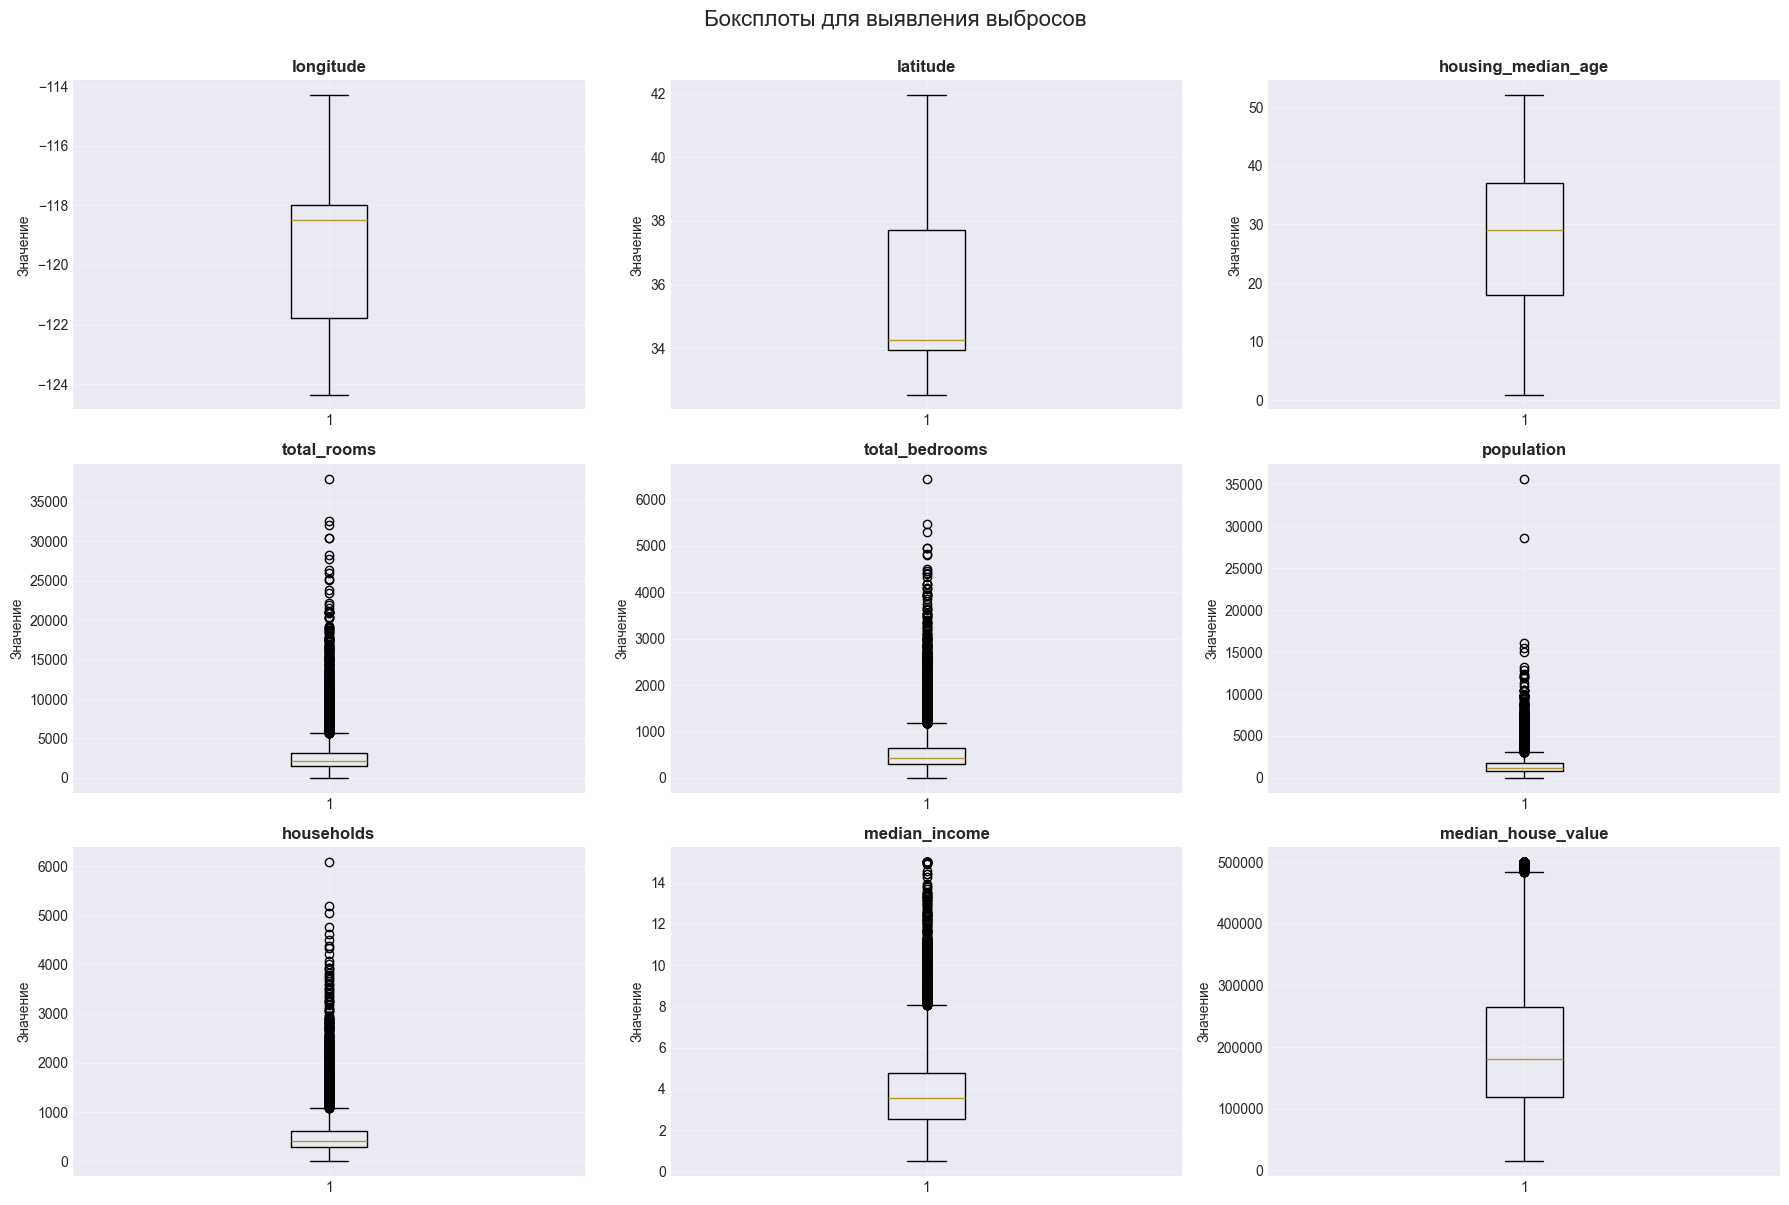

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.suptitle('Боксплоты для выявления выбросов', fontsize=16, y=1.00)

for idx, column in enumerate(df.columns):
    ax = axes[idx // 3, idx % 3]
    ax.boxplot(df[column].dropna(), vert=True)
    ax.set_title(f'{column}', fontsize=12, fontweight='bold')
    ax.set_ylabel('Значение')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


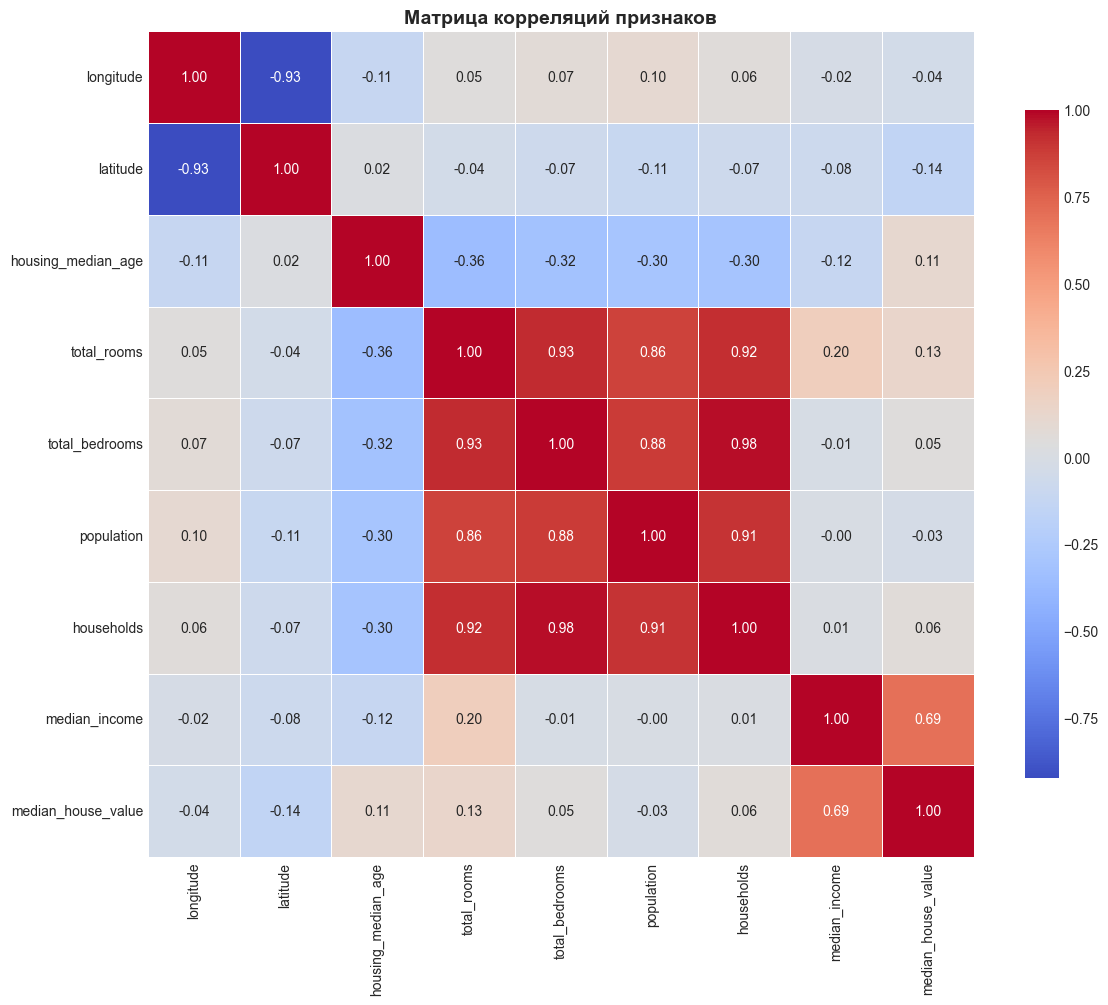

Корреляция признаков с целевой переменной:
median_house_value    1.00
median_income         0.69
total_rooms           0.13
housing_median_age    0.11
households            0.06
total_bedrooms        0.05
population           -0.03
longitude            -0.04
latitude             -0.14
Name: median_house_value, dtype: float64


In [7]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляций признаков', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("Корреляция признаков с целевой переменной:")
print(correlation_matrix['median_house_value'].sort_values(ascending=False))


## 3. Предварительная обработка данных


In [8]:
df_processed = df.copy()

print(f"Пропущенных значений {df_processed.isnull().sum().sum()}")

for column in df_processed.columns:
    if df_processed[column].isnull().sum() > 0:
        median_value = df_processed[column].median()
        df_processed[column].fillna(median_value, inplace=True)

Пропущенных значений 0


In [9]:
target_column = 'median_house_value'
y = df_processed[target_column].values

X_columns = [col for col in df_processed.columns if col != target_column]
X = df_processed[X_columns].values

X_min = X.min(axis=0)
X_max = X.max(axis=0)
X_range = X_max - X_min

X_range[X_range == 0] = 1

X_normalized = (X - X_min) / X_range


## 4. Разделение данных на обучающий и тестовый наборы


In [10]:
def train_test_split(X, y, test_size=0.2, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)
    
    n_samples = X.shape[0]
    n_test = int(n_samples * test_size)
    
    indices = np.random.permutation(n_samples)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    return X[train_indices], X[test_indices], y[train_indices], y[test_indices]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    X_normalized, y, test_size=0.2, random_state=42
)

print(f"Размер обучающей выборки: {X_train.shape[0]} образцов")
print(f"Размер тестовой выборки: {X_test.shape[0]} образцов")

Размер обучающей выборки: 13600 образцов
Размер тестовой выборки: 3400 образцов


## 5. Реализация линейной регрессии с нуля


In [12]:
class LinearRegression:
    """
    Линейная регрессия методом наименьших квадратов .

    Модель: y = X @ w + b

    Метод наименьших квадратов минимизирует:
    L = sum((y_true - y_pred)^2)
    """
    
    def __init__(self):
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        
        X_extended = np.c_[np.ones((n_samples, 1)), X]
        
        XtX = X_extended.T @ X_extended
        
        XtX_inv = np.linalg.inv(XtX)
        
        Xty = X_extended.T @ y
        
        theta = XtX_inv @ Xty
        
        self.bias = theta[0]
        self.weights = theta[1:]
        
        return self
    
    def predict(self, X):
        if self.weights is None or self.bias is None:
            raise ValueError("Модель не обучена. Сначала вызовите метод fit().")
        
        return X @ self.weights + self.bias
    
    def score(self, X, y):
        """        
        R2 = 1 - (SS_res / SS_tot)
        
        где:
        SS_res = sum((y_true - y_pred)^2)
        SS_tot = sum((y_true - y_mean)^2)
        """
        y_pred = self.predict(X)
        
        ss_res = np.sum((y - y_pred) ** 2)
        
        ss_tot = np.sum((y - np.mean(y)) ** 2)
        
        r2 = 1 - (ss_res / ss_tot)
        
        return r2
    
    def mse(self, X, y):
        """        
        MSE = (1/n) * sum((y_true - y_pred)^2)
        """
        y_pred = self.predict(X)
        return np.mean((y - y_pred) ** 2)
    
    def rmse(self, X, y):
        """        
        RMSE = sqrt(MSE)
        """
        return np.sqrt(self.mse(X, y))
    
    def mae(self, X, y):
        """        
        MAE = (1/n) * sum(|y_true - y_pred|)
        """
        y_pred = self.predict(X)
        return np.mean(np.abs(y - y_pred))


In [13]:
feature_names = X_columns
print(f"Доступные признаки: {feature_names}")
print(f"Всего признаков: {len(feature_names)}")


Доступные признаки: ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
Всего признаков: 8


### Модель 1: Использование всех признаков


In [14]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

y_train_pred1 = model1.predict(X_train)
y_test_pred1 = model1.predict(X_test)

# Метрики
r2_train1 = model1.score(X_train, y_train)
r2_test1 = model1.score(X_test, y_test)
mse_train1 = model1.mse(X_train, y_train)
mse_test1 = model1.mse(X_test, y_test)
rmse_train1 = model1.rmse(X_train, y_train)
rmse_test1 = model1.rmse(X_test, y_test)
mae_train1 = model1.mae(X_train, y_train)
mae_test1 = model1.mae(X_test, y_test)

print(f"Используемые признаки ({len(feature_names)}):")
for i, name in enumerate(feature_names, 1):
    print(f"{i}. {name}")

print()
print(f"Метрики на обучающей выборке:")
print(f"- R2: {r2_train1:.6f}")
print(f"- MSE: {mse_train1:.2f}")
print(f"- RMSE: {rmse_train1:.2f}")
print(f"- MAE: {mae_train1:.2f}")

print()
print(f"Метрики на тестовой выборке:")
print(f"- R2: {r2_test1:.6f}")
print(f"- MSE: {mse_test1:.2f}")
print(f"- RMSE: {rmse_test1:.2f}")
print(f"- MAE: {mae_test1:.2f}")

print()
print(f"Веса признаков:")
weights_with_names1 = list(zip(feature_names, model1.weights))
weights_sorted1 = sorted(weights_with_names1, key=lambda x: abs(x[1]), reverse=True)
for name, weight in weights_sorted1[:5]:
    print(f"- {name}: {weight:.6f}")

Используемые признаки (8):
1. longitude
2. latitude
3. housing_median_age
4. total_rooms
5. total_bedrooms
6. population
7. households
8. median_income

Метрики на обучающей выборке:
- R2: 0.635269
- MSE: 4875656612.33
- RMSE: 69825.90
- MAE: 51008.78

Метрики на тестовой выборке:
- R2: 0.663640
- MSE: 4634658406.22
- RMSE: 68078.33
- MAE: 49983.47

Веса признаков:
- population: -1272208.845789
- total_bedrooms: 732734.180874
- median_income: 582831.570973
- longitude: -436391.086779
- latitude: -405630.324795


### Модель 2: Использование только самых коррелирующих признаков


In [15]:
selected_features2 = ['median_income', 'latitude', 'longitude', 'housing_median_age']
feature_indices2 = [feature_names.index(f) for f in selected_features2 if f in feature_names]

X_train2 = X_train[:, feature_indices2]
X_test2 = X_test[:, feature_indices2]

model2 = LinearRegression()
model2.fit(X_train2, y_train)

y_train_pred2 = model2.predict(X_train2)
y_test_pred2 = model2.predict(X_test2)

r2_train2 = model2.score(X_train2, y_train)
r2_test2 = model2.score(X_test2, y_test)
mse_train2 = model2.mse(X_train2, y_train)
mse_test2 = model2.mse(X_test2, y_test)
rmse_train2 = model2.rmse(X_train2, y_train)
rmse_test2 = model2.rmse(X_test2, y_test)
mae_train2 = model2.mae(X_train2, y_train)
mae_test2 = model2.mae(X_test2, y_test)

print(f"Используемые признаки ({len(feature_indices2)}):")
for i, idx in enumerate(feature_indices2, 1):
    print(f"{i}. {feature_names[idx]}")

print()
print(f"Метрики на обучающей выборке:")
print(f"- R2: {r2_train2:.6f}")
print(f"- MSE: {mse_train2:.2f}")
print(f"- RMSE: {rmse_train2:.2f}")
print(f"- MAE: {mae_train2:.2f}")

print()
print(f"Метрики на тестовой выборке:")
print(f"- R2: {r2_test2:.6f}")
print(f"- MSE: {mse_test2:.2f}")
print(f"- RMSE: {rmse_test2:.2f}")
print(f"- MAE: {mae_test2:.2f}")

print()
print(f"Веса признаков:")
for idx, weight in zip(feature_indices2, model2.weights):
    print(f"- {feature_names[idx]}: {weight:.6f}")

Используемые признаки (4):
1. median_income
2. latitude
3. longitude
4. housing_median_age

Метрики на обучающей выборке:
- R2: 0.593928
- MSE: 5428299621.81
- RMSE: 73677.00
- MAE: 54552.22

Метрики на тестовой выборке:
- R2: 0.613793
- MSE: 5321486095.22
- RMSE: 72948.52
- MAE: 53716.74

Веса признаков:
- median_income: 545383.947486
- latitude: -422678.658329
- longitude: -459301.147198
- housing_median_age: 47197.428991


### Модель 3: Использование признаков, связанных с населением и домами


In [16]:
selected_features3 = ['total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']
feature_indices3 = [feature_names.index(f) for f in selected_features3 if f in feature_names]

X_train3 = X_train[:, feature_indices3]
X_test3 = X_test[:, feature_indices3]

model3 = LinearRegression()
model3.fit(X_train3, y_train)

y_train_pred3 = model3.predict(X_train3)
y_test_pred3 = model3.predict(X_test3)

r2_train3 = model3.score(X_train3, y_train)
r2_test3 = model3.score(X_test3, y_test)
mse_train3 = model3.mse(X_train3, y_train)
mse_test3 = model3.mse(X_test3, y_test)
rmse_train3 = model3.rmse(X_train3, y_train)
rmse_test3 = model3.rmse(X_test3, y_test)
mae_train3 = model3.mae(X_train3, y_train)
mae_test3 = model3.mae(X_test3, y_test)

print(f"Используемые признаки ({len(feature_indices3)}):")
for i, idx in enumerate(feature_indices3, 1):
    print(f"{i}. {feature_names[idx]}")

print()
print(f"Метрики на обучающей выборке:")
print(f"- R2: {r2_train3:.6f}")
print(f"- MSE: {mse_train3:.2f}")
print(f"- RMSE: {rmse_train3:.2f}")
print(f"- MAE: {mae_train3:.2f}")

print()
print(f"Метрики на тестовой выборке:")
print(f"- R2: {r2_test3:.6f}")
print(f"- MSE: {mse_test3:.2f}")
print(f"- RMSE: {rmse_test3:.2f}")
print(f"- MAE: {mae_test3:.2f}")

print()
print(f"Веса признаков:")
for idx, weight in zip(feature_indices3, model3.weights):
    print(f"- {feature_names[idx]}: {weight:.6f}")

Используемые признаки (5):
1. total_rooms
2. total_bedrooms
3. population
4. households
5. median_income

Метрики на обучающей выборке:
- R2: 0.529643
- MSE: 6287659678.08
- RMSE: 79294.76
- MAE: 58626.65

Метрики на тестовой выборке:
- R2: 0.557389
- MSE: 6098672216.02
- RMSE: 78094.00
- MAE: 57856.41

Веса признаков:
- total_rooms: -944396.796604
- total_bedrooms: 491424.905592
- population: -1213906.608067
- households: 955856.252295
- median_income: 683781.548302


## 7. Сравнение результатов моделей


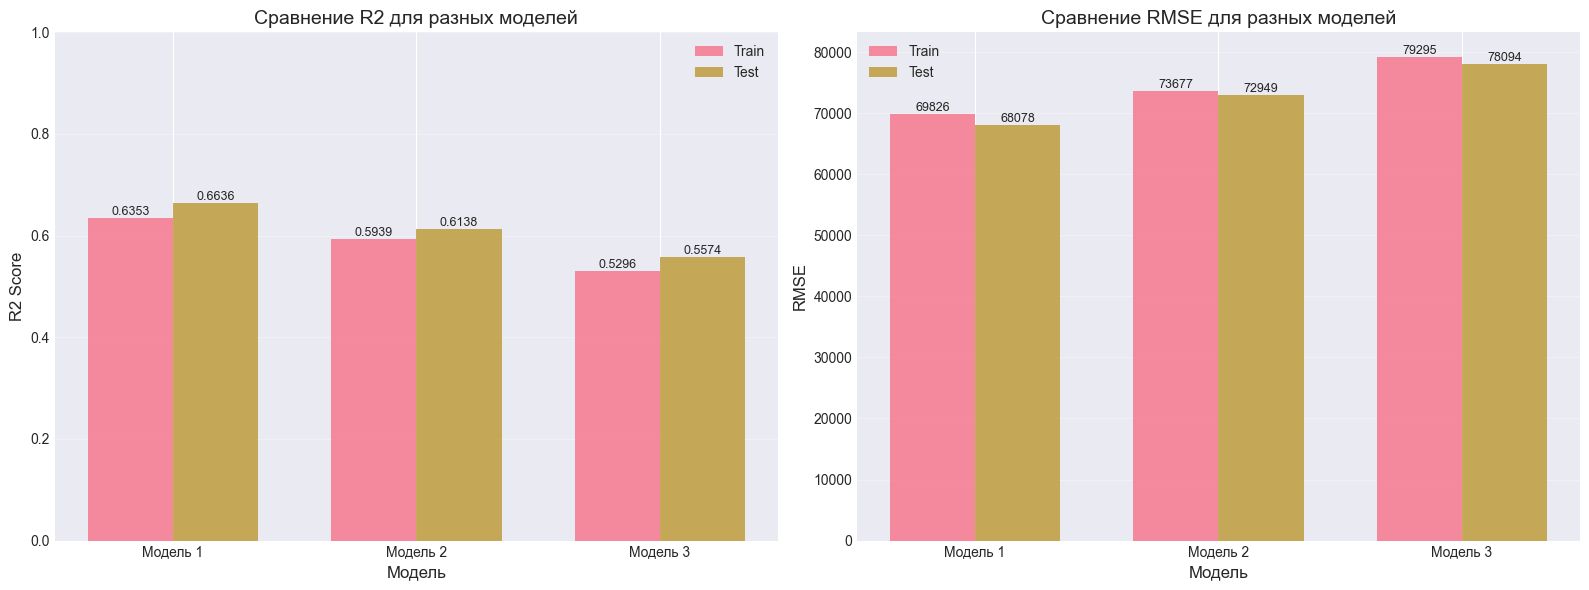

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

models_names = ['Модель 1', 'Модель 2', 'Модель 3']
r2_train_scores = [r2_train1, r2_train2, r2_train3]
r2_test_scores = [r2_test1, r2_test2, r2_test3]

x = np.arange(len(models_names))
width = 0.35

bars1 = axes[0].bar(x - width/2, r2_train_scores, width, label='Train', alpha=0.8)
bars2 = axes[0].bar(x + width/2, r2_test_scores, width, label='Test', alpha=0.8)

axes[0].set_xlabel('Модель', fontsize=12)
axes[0].set_ylabel('R2 Score', fontsize=12)
axes[0].set_title('Сравнение R2 для разных моделей', fontsize=14)
axes[0].set_xticks(x)
axes[0].set_xticklabels(models_names)
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim([0, 1.0])

for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        axes[0].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.4f}',
                    ha='center', va='bottom', fontsize=9)

rmse_train_scores = [rmse_train1, rmse_train2, rmse_train3]
rmse_test_scores = [rmse_test1, rmse_test2, rmse_test3]

bars3 = axes[1].bar(x - width/2, rmse_train_scores, width, label='Train', alpha=0.8)
bars4 = axes[1].bar(x + width/2, rmse_test_scores, width, label='Test', alpha=0.8)

axes[1].set_xlabel('Модель', fontsize=12)
axes[1].set_ylabel('RMSE', fontsize=12)
axes[1].set_title('Сравнение RMSE для разных моделей', fontsize=14)
axes[1].set_xticks(x)
axes[1].set_xticklabels(models_names)
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

for bars in [bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.0f}',
                    ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


## 8. Бонусное задание: Синтетический признак


In [18]:
idx_total_rooms = feature_names.index('total_rooms')
idx_total_bedrooms = feature_names.index('total_bedrooms')
idx_population = feature_names.index('population')
idx_households = feature_names.index('households')

# 1. Комнат на домохозяйство (rooms_per_household)
rooms_per_household_train = X_train[:, idx_total_rooms] / (X_train[:, idx_households] + 1e-10)

# 2. Спален на комнату (bedrooms_per_room)
bedrooms_per_room_train = X_train[:, idx_total_bedrooms] / (X_train[:, idx_total_rooms] + 1e-10)

# 3. Население на домохозяйство (population_per_household)
population_per_household_train = X_train[:, idx_population] / (X_train[:, idx_households] + 1e-10)


rooms_per_household_test = X_test[:, idx_total_rooms] / (X_test[:, idx_households] + 1e-10)
bedrooms_per_room_test = X_test[:, idx_total_bedrooms] / (X_test[:, idx_total_rooms] + 1e-10)
population_per_household_test = X_test[:, idx_population] / (X_test[:, idx_households] + 1e-10)

X_train_synthetic = np.column_stack([
    X_train,
    rooms_per_household_train.reshape(-1, 1),
    bedrooms_per_room_train.reshape(-1, 1),
    population_per_household_train.reshape(-1, 1)
])

X_test_synthetic = np.column_stack([
    X_test,
    rooms_per_household_test.reshape(-1, 1),
    bedrooms_per_room_test.reshape(-1, 1),
    population_per_household_test.reshape(-1, 1)
])


In [19]:
model_bonus = LinearRegression()
model_bonus.fit(X_train_synthetic, y_train)

y_train_pred_bonus = model_bonus.predict(X_train_synthetic)
y_test_pred_bonus = model_bonus.predict(X_test_synthetic)

r2_train_bonus = model_bonus.score(X_train_synthetic, y_train)
r2_test_bonus = model_bonus.score(X_test_synthetic, y_test)
mse_train_bonus = model_bonus.mse(X_train_synthetic, y_train)
mse_test_bonus = model_bonus.mse(X_test_synthetic, y_test)
rmse_train_bonus = model_bonus.rmse(X_train_synthetic, y_train)
rmse_test_bonus = model_bonus.rmse(X_test_synthetic, y_test)
mae_train_bonus = model_bonus.mae(X_train_synthetic, y_train)
mae_test_bonus = model_bonus.mae(X_test_synthetic, y_test)

print(f"Метрики на обучающей выборке:")
print(f"- R2: {r2_train_bonus:.6f}")
print(f"- MSE: {mse_train_bonus:.2f}")
print(f"- RMSE: {rmse_train_bonus:.2f}")
print(f"- MAE: {mae_train_bonus:.2f}")

print()
print(f"Метрики на тестовой выборке:")
print(f"- R2: {r2_test_bonus:.6f}")
print(f"- MSE: {mse_test_bonus:.2f}")
print(f"- RMSE: {rmse_test_bonus:.2f}")
print(f"- MAE: {mae_test_bonus:.2f}")

Метрики на обучающей выборке:
- R2: 0.635804
- MSE: 4868509705.89
- RMSE: 69774.71
- MAE: 50967.36

Метрики на тестовой выборке:
- R2: 0.663781
- MSE: 4632708353.27
- RMSE: 68064.00
- MAE: 49954.44
